In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings(action='ignore')

data_dir = '/content/drive/MyDrive/week7_data/'

In [4]:
Train = pd.read_csv(data_dir + 'Train.csv')
Test = pd.read_csv(data_dir + 'Test.csv')
submission = pd.read_csv(data_dir + 'submission.csv')

In [6]:
X = Train.iloc[:, :-1].values
X = X.reshape(-1, 28, 28, 1)
y = Train.iloc[:, -1].values

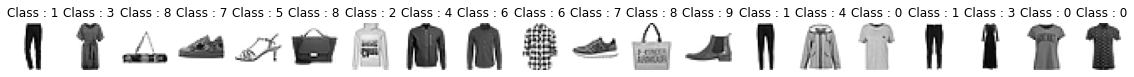

In [7]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
  plt.subplot(1, 20, idx + 1)
  plt.axis('off')
  plt.imshow(X[idx].reshape(28, 28), cmap='gray_r')
  plt.title(f'Class : {y[idx]}')

In [8]:
X_test = Test.values
X_test = X_test.reshape(-1, 28, 28, 1)

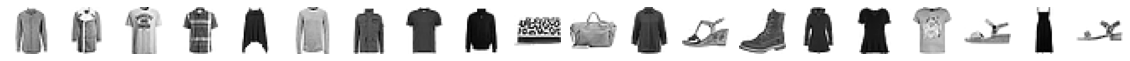

In [9]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
  plt.subplot(1, 20, idx + 1)
  plt.axis('off')
  plt.imshow(X_test[idx].reshape(28, 28), cmap='gray_r')

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 16, stratify = y, shuffle = True)

# 정규화
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [11]:
BATCH_SIZE = 64
EPOCHS = 100

In [12]:
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),

    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(64, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(32, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),    

    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1

In [13]:
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
result = model.fit(X_train, y_train, epochs=100, validation_data = (X_val, y_val))

Epoch 1/100
1488/1488 [==============================] - 19s 10ms/step - loss: 0.7278 - accuracy: 0.7482 - val_loss: 0.6097 - val_accuracy: 0.7726
Epoch 2/100
1488/1488 [==============================] - 14s 10ms/step - loss: 0.5653 - accuracy: 0.8086 - val_loss: 0.4790 - val_accuracy: 0.8278
Epoch 3/100
1488/1488 [==============================] - 14s 10ms/step - loss: 0.5146 - accuracy: 0.8262 - val_loss: 0.4035 - val_accuracy: 0.8600
Epoch 4/100
1488/1488 [==============================] - 14s 10ms/step - loss: 0.4858 - accuracy: 0.8355 - val_loss: 0.3757 - val_accuracy: 0.8608
Epoch 5/100
1488/1488 [==============================] - 14s 10ms/step - loss: 0.4593 - accuracy: 0.8426 - val_loss: 0.3904 - val_accuracy: 0.8626
Epoch 6/100
1488/1488 [==============================] - 13s 9ms/step - loss: 0.4391 - accuracy: 0.8483 - val_loss: 0.3793 - val_accuracy: 0.8550
Epoch 7/100
1488/1488 [==============================] - 14s 10ms/step - loss: 0.4219 - accuracy: 0.8543 - val_loss: 0.

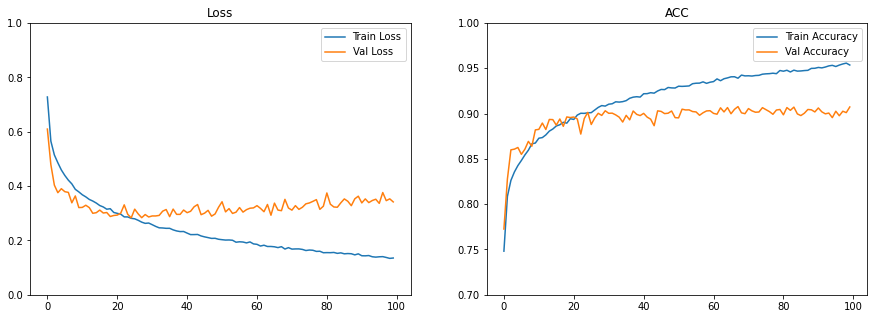

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

In [16]:
pred_label = np.argmax(model.predict(X_test), axis = 1)

submission['label'] = pred_label

submission.to_csv(data_dir + 'keras_BaseLine_Model.csv', index = False)

submission.head()

,id,label
0,0,6
1,1,4
2,2,0
3,3,6
4,4,0
